<a href="https://colab.research.google.com/github/satishgc227/Derby-project/blob/main/Real_Horse_problem_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from imblearn.over_sampling  import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout



In [2]:
df=pd.read_csv("/content/edited complete.csv",encoding='latin')

In [3]:
df.describe()

race_number   trakus_index      latitude     longitude   distance_id   \
count  51224.000000   51224.000000  51224.000000  51224.000000  51224.000000   
mean       4.786135     222.269620     41.215743    -73.789433    903.856591   
std        2.786966     168.483301      0.991457      0.045267    349.671677   
min        1.000000       1.000000     40.666762    -73.832555    550.000000   
25%        2.000000     100.000000     40.672357    -73.829820    800.000000   
50%        5.000000     199.000000     40.675523    -73.827214    800.000000   
75%        7.000000     303.000000     40.717286    -73.727959    900.000000   
max       12.000000    1062.000000     43.073949    -73.716037   2000.000000   

       run_up_distance            purse    post_time   weight_carried   \
count      51224.000000    51224.000000  51224.000000     51224.000000   
mean          58.706856    64470.794940    518.495334       124.784886   
std           34.842687    90386.842816    378.418152         9.565131   
min            0.000000    16000.000000    102.000000       111.000000   
25%           45.000000    34000.000000    240.000000       120.000000   
50%           54.000000    50000.000000    400.000000       122.000000   
75%           78.000000    67000.000000    546.000000       124.000000   
max          171.000000  1000000.000000   1259.000000       156.000000   

               odds  position_at_finish   
count  51224.000000         51224.000000  
mean    1615.614165             4.678295  
std     1711.567862             2.408766  
min       35.000000             1.000000  
25%      480.000000             3.000000  
50%     1090.000000             5.000000  
75%     2110.000000             6.000000  
max     8875.000000            11.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51225 entries, 0 to 51224
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             51225 non-null  object 
 1   race_date            51224 non-null  object 
 2   race_number          51224 non-null  float64
 3   program_number       51224 non-null  object 
 4   trakus_index         51224 non-null  float64
 5   latitude             51224 non-null  float64
 6   longitude            51224 non-null  float64
 7   distance_id          51224 non-null  float64
 8   course_type          51224 non-null  object 
 9   track_condition      51224 non-null  object 
 10  run_up_distance      51224 non-null  float64
 11  race_type            51224 non-null  object 
 12  purse                51224 non-null  float64
 13  post_time            51224 non-null  float64
 14  weight_carried       51224 non-null  float64
 15  jockey               51224 non-null 

In [5]:
df.shape

(51225, 18)

In [6]:
fig = px.scatter(df, 
                   x='course_type',
                   y='odds',
                   color='odds',
                   template='seaborn',
                   labels={"course_type": "Course Type", "odds":"Odds"},
                   title='Winning Odds and Course Type ')

fig.update_layout(xaxis_title="Course Type ",yaxis_title="Odds")
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})

fig.show()

In [7]:
fig = px.scatter(df, 
                   y='purse',
                   x='race_number\xa0',
                   color='purse',
                   template='ggplot2',
                   labels={"purse": "Purse", 'race_number\xa0': "Race Number"},
                   title='Purse and Race Number')



fig.show()


In [8]:
fig = px.scatter(df, 
                   y='odds',
                   x='race_number\xa0',
                   color='odds',
                   template='plotly_white',
                   labels={"odds": "Odds", 'race_number\xa0': "Race Number"},
                   title='Winning Odds and Race Number')
fig.show()

In [9]:
fig = px.scatter(df, 
                   y='odds',
                   x='race_date',
                 color='odds',
                   template='ygridoff',
                   labels={"odds": "Odds", 'race_date': "Race Date"},
                   title='Winning Odds and Race Date')
fig.show()

In [20]:
fig = px.scatter(df, 
                   x='race_number\xa0',
                   y='run_up_distance\xa0',
                   color='run_up_distance\xa0',
                   template='ggplot2',
                   labels={"race_number\xa0": "Race Number", 'run_up_distance\xa0': "Run Up Distance"},
                   title='Run Up Distance and Race Number')


fig.show()

In [33]:
fig = px.histogram(df, 
                   y='weight_carried\xa0',
                   x="track_condition\xa0",
                   
                   log_y=True,
                   text_auto=True,
                   template='simple_white',
                   labels={"weight_carried\xa0": "Weight Carried", "track_condition\xa0":"Track Condition"},
                   title='Weight Carried and Track Condition')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [35]:
print('The Average Weight Carried is',np.around(np.mean(df['weight_carried\xa0']),2))

The Average Weight Carried is 124.78


In [36]:
fig = px.scatter(df, 
                   x='race_type\xa0',
                   y="weight_carried\xa0",
                   
                  template='simple_white',
                  labels={"race_type\xa0": "Race Type", "weight_carried\xa0":"Weight Carried"})
                   

fig.update_layout(xaxis_title="Race Type ",yaxis_title="Weight Carried")

fig.show()

In [49]:
fig = px.histogram(df, 
                   y='run_up_distance\xa0',
                   x='track_condition\xa0',
                  
                   log_y=True,
                   text_auto=True,
                   template='simple_white',
                   labels={"run_up_distance\xa0": "Run Up Distance", "track_condition\xa0":"Track Condition"},
                   title='Run Up Distance and Track Condition')

fig.update_layout(xaxis_title="Track Condition ",yaxis_title="Run Up Distance", bargap=0.1)

fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning:

`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.



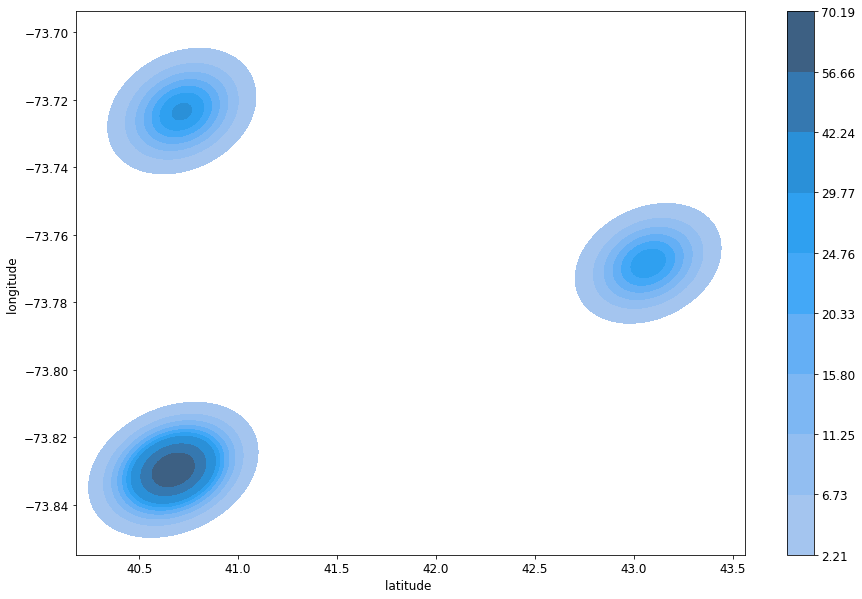

In [56]:
sns.kdeplot(data=df,x='latitude\xa0',y='longitude\xa0',shade=True ,shade_lowest=False,cbar=True)

Data Preprocessing:


In [69]:
df['race_date']=pd.to_datetime(df['race_date'])


In [81]:
input_cols = []
for i in df:
    if i != 'Target':
        input_cols.append(i)

In [85]:
categorical_cols = df[input_cols].select_dtypes(include='object').columns.tolist()
categorical_cols

['track_id', 'course_type', 'track_condition\xa0', 'race_type\xa0']

In [87]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical_cols])

In [109]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols
for i,col in enumerate(encoded_cols):
    print(i,col)
np.shape(encoded_cols)    
df[encoded_cols] = encoder.transform(df[categorical_cols])
#complete_2019.drop(categorical_cols, axis=1, inplace=True)
#complete_2019.head()

0 track_id_AQU
1 track_id_BEL
2 track_id_SAR
3 course_type_D
4 course_type_I
5 course_type_M
6 course_type_O
7 course_type_T
8 course_type_nan
9 track_condition _FM 
10 track_condition _FT 
11 track_condition _GD 
12 track_condition _MY 
13 track_condition _SY 
14 track_condition _YL 
15 track_condition _nan
16 race_type _ALW
17 race_type _AOC
18 race_type _CLM
19 race_type _SST
20 race_type _STK
21 race_type _nan


ValueError: ignored

OneHotEncoder()